<a href="https://colab.research.google.com/github/awill139/Demystifying-AI-Course/blob/master/Breaking_Down_Optimizers_class_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In class 4, we will break down optimizers a little better than last time, and then compare all of our work to what can be done in Tensorflow 2.0 (Keras)

We will use one of the most famous machine learning datasets, MNIST which is recognition of handwritten digits

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import math
!pip install tensorflow==2.0.0-alpha0

import tensorflow as tf

mnist = tf.keras.datasets.mnist
from sklearn.metrics import classification_report, confusion_matrix



     |████████████████████████████████| 79.9MB 1.2MB/s 
     |████████████████████████████████| 3.0MB 36.7MB/s 
     |████████████████████████████████| 61kB 26.5MB/s 
     |████████████████████████████████| 419kB 45.9MB/s 
  Found existing installation: tensorflow 1.13.1
    Uninstalling tensorflow-1.13.1:
      Successfully uninstalled tensorflow-1.13.1


Start by loading the data and processesing it

We need to break down the pictures of the digits into single arrays of 784 as opposed to the original 28 x 28 and scale it down so each value is between 1 and 0

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x = x_train.reshape(60000, 784).T
x_test = x_test.reshape(10000, 784).T
y = y_train.reshape(1, y_train.shape[0])
y_new = np.eye(10)[y.astype('int32')]
y_new = y_new.T.reshape(10, 60000)

y_test = y_test.reshape(1, y_test.shape[0])
y_test = np.eye(10)[y_test.astype('int32')]
y_test = y_test.T.reshape(10, 10000)

np.random.seed(3)

11493376/11490434 [==============================] - 0s 0us/step


To show one of our digits and its label

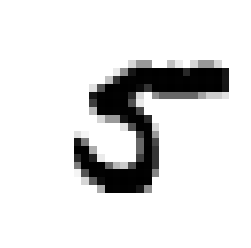

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
import matplotlib
import matplotlib.pyplot as plt

i = 1313
plt.imshow(x[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_new[:,i])

Some activation functions

We will use the softmax activation function which is good for multi-class classification 

![](https://jamesmccaffrey.files.wordpress.com/2016/03/softmaxequation.jpg?w=640)

In [0]:
def sigmoid(x):
    s = 1/(1+np.exp(-x))
    return s

def relu(x):
    s = np.maximum(0,x)   
    return s
  
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

This is the cost function we will use to evaluate softmax

In [0]:
def compute_cost(A2, y):

    loss_sum = np.sum(np.multiply(y, np.log(A2)))
    m = y.shape[1]
    cost = -(1 / m) * loss_sum

    return cost

We should be familiar with these next parts.

We are starting with our normal gradient descent which we have used since the beginning

In [0]:
x_n = x.shape[0]
y_n = y.shape[0]
n = x.shape[1]
hidden = 128
lr = 1.2
iters = 101
epsilon = 1e-8

In [0]:
W1 = np.random.randn(hidden, x_n)
b1 = np.zeros(shape=(hidden, 1))
W2 = np.random.randn(10, hidden)
b2 = np.zeros(shape=(10, 1))

In [0]:
Z1 = np.dot(W1, x) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = softmax(Z2)

In [0]:
dZ2 = A2 - y_new
dW2 = (1 / n) * np.dot(dZ2, A1.T)
db2 = (1 / n) * np.sum(dZ2, axis=1, keepdims=True)
dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid(Z1) + (1 - sigmoid(Z1)))
dW1 = (1 / n) * np.dot(dZ1, x.T)
db1 = (1 / n) * np.sum(dZ1, axis=1, keepdims=True)

In [0]:
W1 = W1 - lr * dW1
b1 = b1 - lr * db1
W2 = W2 - lr * dW2
b2 = b2 - lr * db2

In [0]:
print('W1: {}'.format(W1))
#print('b1: {}'.format(b1))
print('W2: {}'.format(W2))
#print('b2: {}'.format(b2))
print('Cost: {}'.format(compute_cost(A2, y)))

W1: [[ 1.78862847  0.43650985  0.09649747 ...  2.31777471  0.26024073
  -0.01069513]
 [-0.2319775  -0.11520507 -0.27226691 ... -0.26004721  0.58534487
   0.3374218 ]
 [ 1.3154336  -1.70111231  1.19354402 ... -0.51744219 -1.29282333
  -0.2998427 ]
 ...
 [ 0.43690314 -1.07846802 -0.49963477 ...  0.44655418 -0.88954612
  -2.31765113]
 [ 1.29223593 -1.22698503 -2.06729195 ...  1.97019621  0.36592614
  -2.0289277 ]
 [-1.13589945  0.33355368  0.61694476 ... -0.69336508 -0.25056634
  -0.85917367]]
W2: [[-0.78328702  0.00591215 -0.86628507 ...  1.82357535  0.08512974
  -0.01082282]
 [ 0.31786464 -1.36516115 -0.79506735 ...  0.38013504 -0.60144085
   0.09036441]
 [-0.51521194  1.05638074  0.86057146 ... -1.18328979 -0.66520765
   0.29526019]
 ...
 [-0.16154249 -0.72621059  1.14796735 ...  1.48662007  0.92979232
  -0.75490721]
 [ 2.89923983  0.53437015 -0.32688387 ... -0.31282679 -1.3937242
  -0.29258665]
 [ 1.37515557  1.17648598 -0.71140068 ... -0.20163445  0.60622763
   0.35396685]]
Cost: 510

In [0]:
for i in range(iters):
  Z1 = np.dot(W1, x) + b1
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = softmax(Z2)
  
  dZ2 = A2 - y_new
  dW2 = (1 / n) * np.dot(dZ2, A1.T)
  db2 = (1 / n) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid(Z1) + (1 - sigmoid(Z1)))
  dW1 = (1 / n) * np.dot(dZ1, x.T)
  db1 = (1 / n) * np.sum(dZ1, axis=1, keepdims=True)
  
  W1 = W1 - lr * dW1
  b1 = b1 - lr * db1
  W2 = W2 - lr * dW2
  b2 = b2 - lr * db2
  
  if i % 10 == 0:
    print('Cost after {} iters: {}'.format(i, compute_cost(A2, y)))

Cost after 0 iters: 905.1033892227925
Cost after 10 iters: 190.58536806086954
Cost after 20 iters: 289.8891146114625
Cost after 30 iters: 340.9742984553123


KeyboardInterrupt: ignored

In [0]:
Z1 = np.dot(W1, x_test) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

What did one of the results look like?

In [0]:
print(A2[0])
print(y_new[0])

Now, let us try this out with momentum.

If you recall, momentum is the when we find the moving average of the past gradients. The hyper parameter beta (sometimes called the decay) essentially controls how many of the past values we want to include. With a beta of 0.9, it is about 10

We initialize to 0 to start to have the moment estimates biased toward 0, especially to start

In [0]:
beta = 0.9

vW1 = np.zeros_like(W1)
vb1 = np.zeros_like(b1)
vW2 = np.zeros_like(W2)
vb2 = np.zeros_like(b2)

In [0]:
W1 = np.random.randn(hidden, x_n)
b1 = np.zeros(shape=(hidden, 1))
W2 = np.random.randn(10, hidden)
b2 = np.zeros(shape=(10, 1))

In [0]:
Z1 = np.dot(W1, x) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = softmax(Z2)

In [0]:
dZ2 = A2 - y_new
dW2 = (1 / n) * np.dot(dZ2, A1.T)
db2 = (1 / n) * np.sum(dZ2, axis=1, keepdims=True)
dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid(Z1) + (1 - sigmoid(Z1)))
dW1 = (1 / n) * np.dot(dZ1, x.T)
db1 = (1 / n) * np.sum(dZ1, axis=1, keepdims=True)

We will define the velocity, where momentum really happens. We start by multiplying the beta with the previous velocity, then taking 1 - beta multiplied by the gradient. This is our moving average

In [0]:
vW1 = beta * vW1 + (1 - beta) * dW1
vb1 = beta * vb1 + (1 - beta) * db1
vW2 = beta * vW2 + (1 - beta) * dW2
vb2 = beta * vb2 + (1 - beta) * db2

In [0]:
W1 = W1 - lr * vW1
b1 = b1 - lr * vb1
W2 = W2 - lr * vW2
b2 = b2 - lr * vb2

In [0]:
print('W1: {}'.format(W1))
#print('b1: {}'.format(b1))
print('W2: {}'.format(W2))
#print('b2: {}'.format(b2))
print('Cost: {}'.format(compute_cost(A2, y)))

In [0]:
vW1 = np.zeros_like(W1)
vb1 = np.zeros_like(b1)
vW2 = np.zeros_like(W2)
vb2 = np.zeros_like(b2)

for i in range(iters):
  Z1 = np.dot(W1, x) + b1
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = softmax(Z2)
  
  dZ2 = A2 - y_new
  dW2 = (1 / n) * np.dot(dZ2, A1.T)
  db2 = (1 / n) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid(Z1) + (1 - sigmoid(Z1)))
  dW1 = (1 / n) * np.dot(dZ1, x.T)
  db1 = (1 / n) * np.sum(dZ1, axis=1, keepdims=True)
  
  vW1 = beta * vW1 + (1 - beta) * dW1
  vb1 = beta * vb1 + (1 - beta) * db1
  vW2 = beta * vW2 + (1 - beta) * dW2
  vb2 = beta * vb2 + (1 - beta) * db2
  
  W1 = W1 - lr * vW1
  b1 = b1 - lr * vb1
  W2 = W2 - lr * vW2
  b2 = b2 - lr * vb2
  
  if i % 10 == 0:
    print('Cost after {} iters: {}'.format(i, compute_cost(A2, y)))

In [0]:
Z1 = np.dot(W1, x_test) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Now we try with RMSprop

In [0]:
W1 = np.random.randn(hidden, x_n)
b1 = np.zeros(shape=(hidden, 1))
W2 = np.random.randn(10, hidden)
b2 = np.zeros(shape=(10, 1))

Z1 = np.dot(W1, x) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = softmax(Z2)

dZ2 = A2 - y_new
dW2 = (1 / n) * np.dot(dZ2, A1.T)
db2 = (1 / n) * np.sum(dZ2, axis=1, keepdims=True)
dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid(Z1) + (1 - sigmoid(Z1)))
dW1 = (1 / n) * np.dot(dZ1, x.T)
db1 = (1 / n) * np.sum(dZ1, axis=1, keepdims=True)
print('W1: {}'.format(W1))
print('b1: {}'.format(b1))
print('W2: {}'.format(W2))
print('b2: {}'.format(b2))

Similar to momentum, we start with initializing to zero so we have no bias

In [0]:
sW1 = np.zeros_like(W1)
sb1 = np.zeros_like(b1)
sW2 = np.zeros_like(W2)
sb2 = np.zeros_like(b2)

This is where we start to deviate. Instead of multiplying our 0.1 (1 - beta) by the derivative directly, we square it first. this is the S part of RMS or root mean square

In [0]:
sW1 = beta * sW1 + (1 - beta) * np.power(dW1, 2)
sb1 = beta * sb1 + (1 - beta) * np.power(db1, 2)
sW2 = beta * sW2 + (1 - beta) * np.power(dW2, 2)
sb2 = beta * sb2 + (1 - beta) * np.power(db2, 2)
print('sW1: {}'.format(sW1))
print('sb1: {}'.format(sb1))
print('sW2: {}'.format(sW2))
print('sb2: {}'.format(sb2))

Updating the weights is a bit different as well. We take the square root of S added to the hyper parameter epsilon (very small, only there so we do not divide by 0) and then dividing the derivative will give us the average or mean

In [0]:
W1 = W1 - (lr * dW1 / np.sqrt(sW1 + epsilon))
b1 = b1 - (lr * db1 / np.sqrt(sb1 + epsilon))
W2 = W2 - (lr * dW2 / np.sqrt(sW2 + epsilon))
b2 = b2 - (lr * db2 / np.sqrt(sb2 + epsilon))
print('W1: {}'.format(W1))
print('b1: {}'.format(b1))
print('W2: {}'.format(W2))
print('b2: {}'.format(b2))

In [0]:
sW1 = np.zeros_like(W1)
sb1 = np.zeros_like(b1)
sW2 = np.zeros_like(W2)
sb2 = np.zeros_like(b2)

for i in range(iters):
  Z1 = np.dot(W1, x) + b1
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = softmax(Z2)
  
  dZ2 = A2 - y_new
  dW2 = (1 / n) * np.dot(dZ2, A1.T)
  db2 = (1 / n) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid(Z1) + (1 - sigmoid(Z1)))
  dW1 = (1 / n) * np.dot(dZ1, x.T)
  db1 = (1 / n) * np.sum(dZ1, axis=1, keepdims=True)

  sW1 = beta * sW1 + (1 - beta) * np.power(dW1, 2)
  sb1 = beta * sb1 + (1 - beta) * np.power(db1, 2)
  sW2 = beta * sW2 + (1 - beta) * np.power(dW2, 2)
  sb2 = beta * sb2 + (1 - beta) * np.power(db2, 2)

  W1 = W1 - (lr * dW1 / np.sqrt(sW1 + epsilon))
  b1 = b1 - (lr * db1 / np.sqrt(sb1 + epsilon))
  W2 = W2 - (lr * dW2 / np.sqrt(sW2 + epsilon))
  b2 = b2 - (lr * db2 / np.sqrt(sb2 + epsilon))

  if i % 10 == 0:
    print('Cost after {} iters: {}'.format(i, compute_cost(A2, y)))

In [0]:
Z1 = np.dot(W1, x_test) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

Now we combine both in Adam

In [0]:
W1 = np.random.randn(hidden, x_n)
b1 = np.zeros(shape=(hidden, 1))
W2 = np.random.randn(10, hidden)
b2 = np.zeros(shape=(10, 1))

Z1 = np.dot(W1, x) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = softmax(Z2)

dZ2 = A2 - y_new
dW2 = (1 / n) * np.dot(dZ2, A1.T)
db2 = (1 / n) * np.sum(dZ2, axis=1, keepdims=True)
dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid(Z1) + (1 - sigmoid(Z1)))
dW1 = (1 / n) * np.dot(dZ1, x.T)
db1 = (1 / n) * np.sum(dZ1, axis=1, keepdims=True)
print('W1: {}'.format(W1))
print('b1: {}'.format(b1))
print('W2: {}'.format(W2))
print('b2: {}'.format(b2))

We need both our v and our s, velocity and squared values

In [0]:
vW1 = np.zeros_like(W1)
vb1 = np.zeros_like(b1)
vW2 = np.zeros_like(W2)
vb2 = np.zeros_like(b2)
sW1 = np.zeros_like(W1)
sb1 = np.zeros_like(b1)
sW2 = np.zeros_like(W2)
sb2 = np.zeros_like(b2)

Adam has a few extra hyper parameters. Since it combines RMSprop and momentum, each needs its own beta value. These can be the same, but it has been found that 0.9 and 0.999 work best. We also have the epsilon where, even though it is a hyper parameter it is only there so we do not divide by 0 so tuning it isn't needed

In [0]:
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
t = 1 #Not a hyper parameter, a counter

This is the same as velocity

In [0]:
vW1 = beta1 * vW1 + (1 - beta1) * dW1
vb1 = beta1 * vb1 + (1 - beta) * db1
vW2 = beta1 * vW2 + (1 - beta) * dW2
vb2 = beta1 * vb2 + (1 - beta) * db2

print('vW1: {}'.format(vW1))
print('vb1: {}'.format(vb1))
print('vW2: {}'.format(vW2))
print('vb2: {}'.format(vb2))

This is where Adam takes a step further. In momentum and rmsprop, we run the risk of having small velocities and S's

The corrected value will bring the velocity back closer to 1. If they are defined as 0 at first but they should be much larger, this will correct that problem

In [0]:
vW1_corrected = vW1 / (1 - np.power(beta1, t))
vb1_corrected = vb1 / (1 - np.power(beta1, t))
vW2_corrected = vW2 / (1 - np.power(beta1, t))
vb2_corrected = vb2 / (1 - np.power(beta1, t))

print('W1: {}'.format(vW1_corrected))
print('b1: {}'.format(vb1_corrected))
print('W2: {}'.format(vW2_corrected))
print('b2: {}'.format(vb2_corrected))

Same as RMSprop except it is using beta2 (0.999) instead of beta (0.9)

This is just what the authors of the paper found to be the most effective but as a hyper parameter, you may tune it

In [0]:
sW1 = beta2 * sW1 + (1 - beta2) * np.power(dW1, 2)
sb1 = beta2 * sb1 + (1 - beta2) * np.power(db1, 2)
sW2 = beta2 * sW2 + (1 - beta2) * np.power(dW2, 2)
sb2 = beta2 * sb2 + (1 - beta2) * np.power(db2, 2)

print('sW1: {}'.format(sW1))
print('sb1: {}'.format(sb1))
print('sW2: {}'.format(sW2))
print('sb2: {}'.format(sb2))

We need to correct this one as well as it was initialized as 0

In [0]:
sW1_corrected = sW1 / (1 - np.power(beta2, t))
sb1_corrected = sb1 / (1 - np.power(beta2, t))
sW2_corrected = sW2 / (1 - np.power(beta2, t))
sb2_corrected = sb2 / (1 - np.power(beta2, t))

print('sW1_corrected: {}'.format(sW1_corrected))
print('sb1_corrected: {}'.format(sb1_corrected))
print('sW2_corrected: {}'.format(sW2_corrected))
print('sb2_corrected: {}'.format(sb2_corrected))

And we simply update it in a way that resembles both momentum and RMS prop

In [0]:
W1 = W1 - lr * vW1_corrected / np.sqrt(sW1_corrected + epsilon)
b1 = b1 - lr * vb1_corrected / np.sqrt(sb1_corrected + epsilon)
W2 = W2 - lr * vW2_corrected / np.sqrt(sW2_corrected + epsilon)
b2 = b2 - lr * vb2_corrected / np.sqrt(sb2_corrected + epsilon)

print('W1: {}'.format(W1))
print('b1: {}'.format(b1))
print('W2: {}'.format(W2))
print('b2: {}'.format(b2))

In [0]:
vW1 = np.zeros_like(W1)
vb1 = np.zeros_like(b1)
vW2 = np.zeros_like(W2)
vb2 = np.zeros_like(b2)
sW1 = np.zeros_like(W1)
sb1 = np.zeros_like(b1)
sW2 = np.zeros_like(W2)
sb2 = np.zeros_like(b2)

for i in range(iters):
  t += 1
  Z1 = np.dot(W1, x) + b1
  A1 = sigmoid(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = softmax(Z2)
  
  dZ2 = A2 - y_new
  dW2 = (1 / n) * np.dot(dZ2, A1.T)
  db2 = (1 / n) * np.sum(dZ2, axis=1, keepdims=True)
  dZ1 = np.multiply(np.dot(W2.T, dZ2), sigmoid(Z1) + (1 - sigmoid(Z1)))
  dW1 = (1 / n) * np.dot(dZ1, x.T)
  db1 = (1 / n) * np.sum(dZ1, axis=1, keepdims=True)
  
  vW1 = beta1 * vW1 + (1 - beta1) * dW1
  vb1 = beta1 * vb1 + (1 - beta) * db1
  vW2 = beta1 * vW2 + (1 - beta) * dW2
  vb2 = beta1 * vb2 + (1 - beta) * db2

  vW1_corrected = vW1 / (1 - np.power(beta1, t))
  vb1_corrected = vb1 / (1 - np.power(beta1, t))
  vW2_corrected = vW2 / (1 - np.power(beta1, t))
  vb2_corrected = vb2 / (1 - np.power(beta1, t))

  sW1 = beta2 * sW1 + (1 - beta2) * np.power(dW1, 2)
  sb1 = beta2 * sb1 + (1 - beta2) * np.power(db1, 2)
  sW2 = beta2 * sW2 + (1 - beta2) * np.power(dW2, 2)
  sb2 = beta2 * sb2 + (1 - beta2) * np.power(db2, 2)

  sW1_corrected = sW1 / (1 - np.power(beta2, t))
  sb1_corrected = sb1 / (1 - np.power(beta2, t))
  sW2_corrected = sW2 / (1 - np.power(beta2, t))
  sb2_corrected = sb2 / (1 - np.power(beta2, t))

  W1 = W1 - lr * vW1_corrected / np.sqrt(sW1_corrected + epsilon)
  b1 = b1 - lr * vb1_corrected / np.sqrt(sb1_corrected + epsilon)
  W2 = W2 - lr * vW2_corrected / np.sqrt(sW2_corrected + epsilon)
  b2 = b2 - lr * vb2_corrected / np.sqrt(sb2_corrected + epsilon)
  
  if i % 10 == 0:
    print('Cost after {} iters: {}'.format(i, compute_cost(A2, y)))

In [0]:
Z1 = np.dot(W1, x_test) + b1
A1 = sigmoid(Z1)
Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

This was all fun, but let's try it in a modern day framework

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

First with SGD

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/sample - loss: 2.2017 - accuracy: 0.3112
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 1.9580 - accuracy: 0.6161
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 1.7509 - accuracy: 0.7020
Epoch 4/5
60000/60000 [==============================] - 4s 59us/sample - loss: 1.5632 - accuracy: 0.7394
Epoch 5/5
10000/10000 [==============================] - 0s 42us/sample - loss: 1.3078 - accuracy: 0.7829


[1.3078300415039064, 0.7829]

With momentum

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

withMomentum = tf.keras.optimizers.SGD(momentum=0.9)

model.compile(optimizer=withMomentum,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 4s 74us/sample - loss: 1.4505 - accuracy: 0.7062
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.6979 - accuracy: 0.8496
Epoch 3/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5207 - accuracy: 0.8730
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4463 - accuracy: 0.8848
Epoch 5/5
10000/10000 [==============================] - 0s 38us/sample - loss: 0.3728 - accuracy: 0.9025


[0.37280383710861204, 0.9025]

RMSProp

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='sigmoid'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='RMSProp',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.3726 - accuracy: 0.9017
Epoch 2/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1927 - accuracy: 0.9434
Epoch 3/5
60000/60000 [==============================] - 5s 82us/sample - loss: 0.1462 - accuracy: 0.9567
Epoch 4/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1189 - accuracy: 0.9653
Epoch 5/5
10000/10000 [==============================] - 0s 41us/sample - loss: 0.1042 - accuracy: 0.9699


[0.10415860395301134, 0.9699]

Finally, Adam

In [0]:
act = tf.keras.activations.sigmoid(x)


In [0]:


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation = 'relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

model.evaluate(x_test, y_test)

Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2532 - accuracy: 0.9277
Epoch 2/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.1145 - accuracy: 0.9661
Epoch 3/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0789 - accuracy: 0.9762
Epoch 4/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.0583 - accuracy: 0.9819
Epoch 5/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.0454 - accuracy: 0.9856
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0352 - accuracy: 0.9890
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0281 - accuracy: 0.9914
Epoch 8/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0227 - accuracy: 0.9931
Epoch 9/10
60000/60000 [==============================] - 5s 82us/sample - loss: 0.0191 - accuracy: 0.9939
Epoch 10/10
10000/10000 [============

[0.08744631985542364, 0.9753]

It is pretty easy to see why people don't make everything by hand. Not only is the exact same code achievable in much fewer lines, it is also optimized to achieve the best results 